In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qmmc.structure2 import *

In [3]:
# Hyperpriors
mu_0, sigma_0 = Value(0), Value(4)
scale_0, shape_0 = Value(5), Value(5)
n = Value(1000)

# Priors and variables
mu_real = Normal(mu_0, sigma_0, name='mu_real')
sigma_real = InvGamma(scale_0, shape_0, name='sigma_real')
V_real = Normal(mu_real, sigma_real, size=n.value, name='V_real')

In [4]:
# Priors and variables
mu = Normal(mu_0, sigma_0, value=mu_real.value - 2, name='mu')
sigma = InvGamma(scale_0, shape_0, value=sigma_real.value + 2, name='sigma')
V = Normal(mu, sigma, value=V_real.value, size=n.value, observed=True, name='V')

In [5]:
model = Model([mu, sigma, V])

In [6]:
print mu_real.value, sigma_real.value
print mu.value, sigma.value

2.52738783745 1.24191000922
0.527387837451 3.24191000922


In [7]:
model.estimate(300)

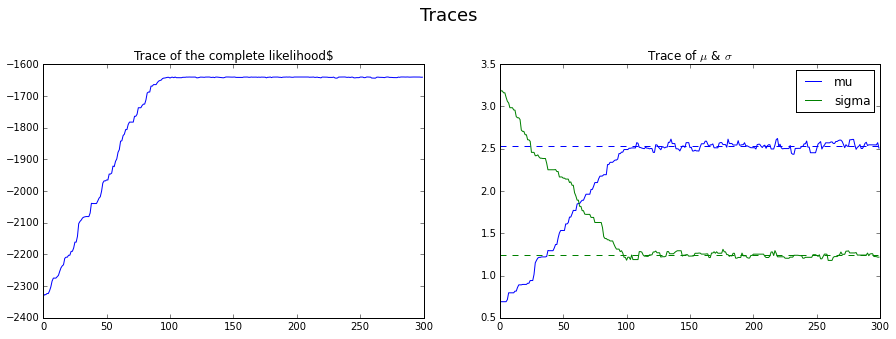

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model.logp_history)
plt.title(r"Trace of the complete likelihood$")

plt.subplot(2, 2, 2)
plt.plot(model.samplers['mu'].get_history())
plt.plot(model.samplers['sigma'].get_history())
plt.axhline(mu_real.value, linestyle='--')
plt.axhline(sigma_real.value, color='g', linestyle='--')
plt.legend(["mu", "sigma"], loc='best')
plt.title(r"Trace of $\mu$ & $\sigma$")

plt.suptitle(r"Traces", size=18)
plt.show()

In [9]:
model.samplers

{'mu': <qmmc.structure2.NormalMHSampler at 0x108fd2690>,
 'sigma': <qmmc.structure2.NormalMHSampler at 0x108fd26d0>}

In [10]:
model.variables

[mu, sigma, V]

In [12]:
mu.children

{V}